In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import utils
%load_ext autoreload

%autoreload 2

%matplotlib inline

In [5]:
gdp = pd.read_csv('../dataset/social-spending-oecd-longrun.csv')
alco = pd.read_csv('../dataset/deaths-attributed-to-alcohol-use-by-age.csv')

In [6]:
display(gdp.head())
display(alco.head())

,Entity,Code,Year,Social Expenditure %GDP - (OWID extrapolated series) (%)
0,Australia,AUS,1880,0
1,Australia,AUS,1890,0
2,Australia,AUS,1900,0
3,Australia,AUS,1910,1.12
4,Australia,AUS,1920,1.66


,Entity,Code,Year,under 5 (deaths),70 and older (deaths),50-69 (deaths),5-14 (deaths),15-49 (deaths)
0,Afghanistan,AFG,1990,NaN,-1.232956,159.044982,0.638576,198.078705
1,Afghanistan,AFG,1991,NaN,-9.539797,134.088808,0.631198,195.418252
2,Afghanistan,AFG,1992,NaN,-17.965002,107.256543,0.697342,203.268134
3,Afghanistan,AFG,1993,NaN,-24.962000,83.888735,0.825245,218.377779
4,Afghanistan,AFG,1994,NaN,-30.838953,62.871469,0.884239,217.774814


In [15]:
gdp = gdp[gdp.Year > 1990]

In [16]:
new = utils.nearestYear(gdp,alco)
new.head()

/Users/kaanbursa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Entity,Code,Year,Social Expenditure %GDP - (OWID extrapolated series) (%),RoundYear
29,Australia,AUS,1995,16.871,1995.0
30,Australia,AUS,2000,18.242,2000.0
31,Australia,AUS,2005,16.681,2005.0
32,Australia,AUS,2010,16.706,2010.0
33,Australia,AUS,2013,18.109,2013.0


In [21]:
# Merge two dataframe on years it matches and country name
df = pd.merge(alco, 
              new,  
              how='inner', left_on=['Entity','Year'], right_on = ['Entity','Year'], suffixes=['_alcohol','_gdp'])
# Rename Social Expediture percentage column
df.rename(columns={'Social Expenditure %GDP - (OWID extrapolated series) (%)': 'Percent_GDP'},inplace=True)
# Delete row with  string '..' Convert object type to float
df = df[df.Percent_GDP != '..']
df.Percent_GDP = df.Percent_GDP.astype(float)
df = df[df.Percent_GDP != 0]
df.dropna(inplace = True)
mean = df.Percent_GDP.mean()
print('the average of percentage spend by countries is {}, the shape of the dataframe is {}'.format(mean,df.shape))

# Gini index indicates if it is higher than there is higher inequality
df.head()

the average of percentage spend by countries is 19.830375, the shape of the dataframe is (48, 11)


,Entity,Code_alcohol,Year,under 5 (deaths),70 and older (deaths),50-69 (deaths),5-14 (deaths),15-49 (deaths),Code_gdp,Percent_GDP,RoundYear
132,Japan,JPN,1995,0.0,-4727.674900,10551.485654,37.103827,6021.128308,JPN,14.055,1995.0
133,Japan,JPN,2000,0.0,-1853.608148,11383.143081,25.808202,5593.063176,JPN,16.269,2000.0
134,Japan,JPN,2005,0.0,-671.048273,10604.396954,20.273024,5110.496159,JPN,18.152,2005.0
135,Japan,JPN,2010,0.0,-372.624937,9477.915302,16.401543,4607.877906,JPN,22.074,2010.0
136,Japan,JPN,2013,0.0,65.051630,8785.259942,16.361422,4174.355736,JPN,23.060,2013.0


In [31]:
die1 = df['70 and older (deaths)'] + df['50-69 (deaths)'] + df['15-49 (deaths)'] + df['under 5 (deaths)']

df['Deaths'] = die1

In [32]:
df.head()

,Entity,Code_alcohol,Year,under 5 (deaths),70 and older (deaths),50-69 (deaths),5-14 (deaths),15-49 (deaths),Code_gdp,Percent_GDP,RoundYear,Deaths
132,Japan,JPN,1995,0.0,-4727.674900,10551.485654,37.103827,6021.128308,JPN,14.055,1995.0,11844.939062
133,Japan,JPN,2000,0.0,-1853.608148,11383.143081,25.808202,5593.063176,JPN,16.269,2000.0,15122.598109
134,Japan,JPN,2005,0.0,-671.048273,10604.396954,20.273024,5110.496159,JPN,18.152,2005.0,15043.844840
135,Japan,JPN,2010,0.0,-372.624937,9477.915302,16.401543,4607.877906,JPN,22.074,2010.0,13713.168271
136,Japan,JPN,2013,0.0,65.051630,8785.259942,16.361422,4174.355736,JPN,23.060,2013.0,13024.667308


In [61]:
def rangeOfPercent(percent):
    if percent < 15:
        return 15
    elif percent < 20:
        return 20
    elif percent < 25:
        return 25
    else:
        return 30

In [62]:
#df.drop(['70 and older (deaths)','50-69 (deaths)','15-49 (deaths)','under 5 (deaths)'],axis=1,inplace=True)
df['Groups'] = df.Percent_GDP.apply(rangeOfPercent)
df.head()

,Entity,Code_alcohol,Year,5-14 (deaths),Code_gdp,Percent_GDP,RoundYear,Deaths,Groups
132,Japan,JPN,1995,37.103827,JPN,14.055,1995.0,11844.939062,15
133,Japan,JPN,2000,25.808202,JPN,16.269,2000.0,15122.598109,20
134,Japan,JPN,2005,20.273024,JPN,18.152,2005.0,15043.844840,20
135,Japan,JPN,2010,16.401543,JPN,22.074,2010.0,13713.168271,25
136,Japan,JPN,2013,16.361422,JPN,23.060,2013.0,13024.667308,25


In [63]:
df.Groups.value_counts()

20    18
25    15
30     9
15     6
Name: Groups, dtype: int64

In [68]:
fif = df[df['Groups'] == 15]
twenty = df[df['Groups'] == 20]
tfive = df[df['Groups'] == 25]
thirty = df[df['Groups'] == 30]

/Users/kaanbursa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


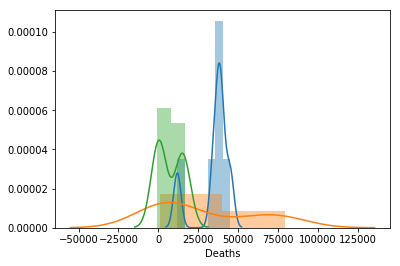

In [70]:

sns.distplot(fif['Deaths'])
sns.distplot(twenty['Deaths'])
sns.distplot(tfive['Deaths'])
#sns.distplot(thirty['Deaths'])